# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 100,min_improvement: 0.001,max_steps: 10000,seed: 372
Step 0: Loss = 8.2129498057413972, performing 26.3 it/sec
Step 100: Loss = 0.2382923227832102, performing 277.2 it/sec
Step 200: Loss = 0.0056218773928237, performing 334.3 it/sec
Step 300: Loss = 0.0033226346846508, performing 398.0 it/sec
No improvement since Step 248, early stopping.
[Best]  Step 247: Loss = 0.0012547549015740
[Final] Step 347: Loss = 0.0020690198609583

predicted end states
------------------------------------
         5th       Mean      95th
TSHC-1  3.30e-02  3.30e-02  3.30e-02
TSHC-2  3.88e-09  3.88e-09  3.89e-09
TSHC-3  1.86e-07  1.86e-07  1.86e-07
TSHC-4  6.96e-11  6.96e-11  6.96e-11
TSHC-5  1.91e-11  1.91e-11  1.91e-11


predicted conditional events
----------------------------------------
             5th       Mean      95th
TSHC        1.00e+00  1.00e+00  1.00e+00
MRSS        5.63e-06  5.63e-06  5.63e-06
DHRS      

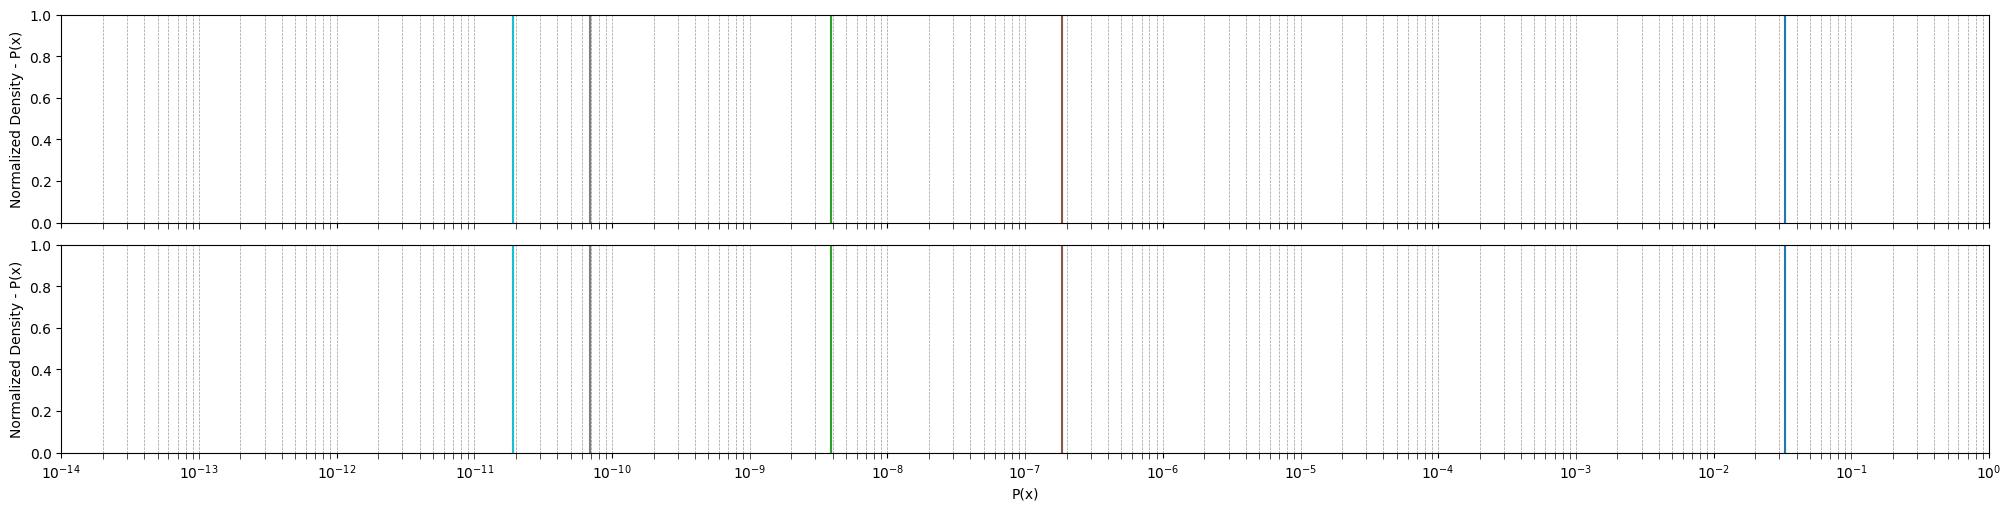

In [3]:
tunable = {
 'num_samples': 10000,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 10000,       # maximum steps, regardless of convergence
 'patience': 100,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 3.3e-2,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['TSHC', 'MRSS', 'DHRS', 'DHRL|MRSS', 'DHRL|~MRSS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'TSHC-1': {
        'sequence': [1, 0, np.nan, 0, np.nan],
        'probability': 3.3e-2,
    },
    'TSHC-2': {
        'sequence': [1, 0, np.nan, 1, np.nan],
        'probability': 3.90e-9,
    },
    'TSHC-3': {
        'sequence': [1, 1, 0, np.nan, 0],
        'probability': 1.85e-7, # There was no given frequency
    },
    'TSHC-4': {
        'sequence': [1, 1, 0, np.nan, 1],
        'probability': 6.9e-11,
    },
    'TSHC-5': {
        'sequence': [1, 1, 1, np.nan, np.nan],
        'probability': 1.9e-11,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)